# Лабораторная работа 4 (Задание №2):
Нарисовать зависимость качества классификации от разных видов Dataset Shift. Визуализация (несколькими графиками) должна показывать как меняется выборка в зависимости от значимости сдвига, как меняется качество классификации в зависимости от значиомсти сдвига. Выборки: несколько синтетических 2d выборок.

## Исполнитель:
Бишук Антон

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

### Концептуальный сдвиг
На обучении данные не нормировались, а в тесте инженеры решили нормировать на константу. В зависимости от величины константы будет меняться влияние сдвига.

In [23]:
N = 2000
Y = np.random.binomial(1, 0.4, size=N)
X = []

mu = np.array([0,0])
sigma = np.array([[1,0],[0,1]])

mu1 = np.array([2/3,2/3])
sigma1 = np.array([[1,1/3],[1/3,1]])

mu0 = np.array([-1/4,-1/4])
sigma0 = np.array([[1,-1/4],[-1/4,1]])


for y in Y:
    if y == 0:
        X.append((np.random.multivariate_normal(mu, sigma, 1) + np.random.multivariate_normal(mu0, sigma0, 1))[0])
    else:
        X.append((np.random.multivariate_normal(mu, sigma, 1) + np.random.multivariate_normal(mu1, sigma1, 1))[0])
        
y_train = Y[:1300]
X_train = np.array(X[:1300])

y_test = Y[1300:]
X_test = np.array(X[1300:])

Text(0.5, 1.0, 'Train')

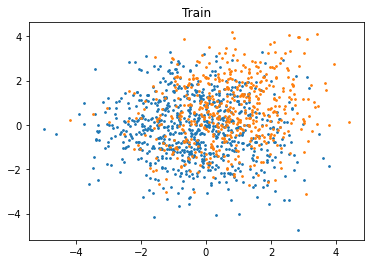

In [39]:
plt.scatter(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], s=3)
plt.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], s=3)
plt.title("Train")

In [57]:
def update(C):
    plt.scatter(X_test[:, 0][y_test == 0] / C, X_test[:, 1][y_test == 0] / C, s=3)
    plt.scatter(X_test[:, 0][y_test == 1] / C, X_test[:, 1][y_test == 1] / C, s=3)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.title("Test")
    plt.title(f"C = {C}, accuracy = {round(accuracy_score(y_test, model.predict(X_test / C)),3)}")
    plt.show()

In [58]:
model = LogisticRegression().fit(X_train, y_train)

In [59]:
interact(update, C = widgets.FloatSlider(value = 1,
                                         min = 1e-3,
                                         max = 5,
                                         step = 1e-3))

interactive(children=(FloatSlider(value=1.0, description='C', max=5.0, min=0.001, step=0.001), Output()), _dom…

<function __main__.update(C)>

### Сдвиг в априорной вероятности

Или иначе -- разные балансы классов в обучении и тесте

In [76]:
N = 1000
Y = np.random.binomial(1, 0.5, size=N)
X = []

mu = np.array([0,0])
sigma = np.array([[1,0],[0,1]])

mu1 = np.array([2/3,2/3])
sigma1 = np.array([[1,1/3],[1/3,1]])

mu0 = np.array([-1/4,-1/4])
sigma0 = np.array([[1,-1/4],[-1/4,1]])

for y in Y:
    if y == 0:
        X.append((np.random.multivariate_normal(mu, sigma, 1) + np.random.multivariate_normal(mu0, sigma0, 1))[0])
    else:
        X.append((np.random.multivariate_normal(mu, sigma, 1) + np.random.multivariate_normal(mu1, sigma1, 1))[0])

X_train = np.array(X)
y_train = Y

In [85]:
def update(part):
    y_test = np.random.binomial(1, part, size=N)
    X = []
    for y in y_test:
        if y == 0:
            X.append((np.random.multivariate_normal(mu, sigma, 1) + np.random.multivariate_normal(mu0, sigma0, 1))[0])
        else:
            X.append((np.random.multivariate_normal(mu, sigma, 1) + np.random.multivariate_normal(mu1, sigma1, 1))[0])
    X_test = np.array(X)

    plt.scatter(X_test[:, 0][y_test == 0], X_test[:, 1][y_test == 0], s=3)
    plt.scatter(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], s=3)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.title("Test")
    plt.title(f"part of class 1 = {part}, accuracy = {round(accuracy_score(y_test, model.predict(X_test)),3)}, precision = {round(precision_score(y_test, model.predict(X_test)),3)}, recall = {round(recall_score(y_test, model.predict(X_test)),3)}")
    plt.show()

Text(0.5, 1.0, 'Train')

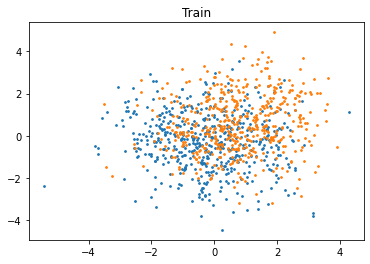

In [86]:
plt.scatter(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], s=3)
plt.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], s=3)
plt.title("Train")

In [87]:
model = LogisticRegression().fit(X_train, y_train)

In [88]:
interact(update, part = widgets.FloatSlider(value = 0.5,
                                         min = 0.05,
                                         max = 0.95,
                                         step = 0.05))

interactive(children=(FloatSlider(value=0.5, description='part', max=0.95, min=0.05, step=0.05), Output()), _d…

<function __main__.update(part)>

## Вывод:

Как и ожидалось сдвиг в данных уменьшает качество на тесте. Однако, в рассматриваемых видах сдвига, качество могло упасть еще сильнее, еслибы использовалась, например, модель лесов, поскольку каждый узел в дереве обучается на порог и если порог будет сдвинут, то все объекты могут попать в один лист